# ASSIGNMENT 1 - Linear Regression
----------------
----------------

## A. Data Preprocessing
-----

### Imports and visualisation of the structure

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

main_df = pd.read_csv("Regression/Co2EmissionDataset.csv")

In [2]:
# Getting the gist of the data
main_df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
main_df.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


<AxesSubplot:>

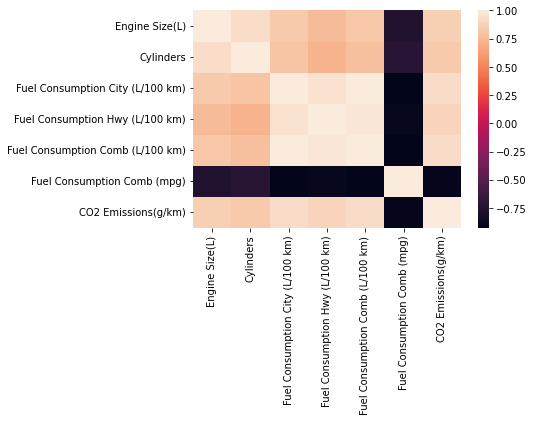

In [4]:
sns.heatmap(main_df.corr())

As there is very high correlation between the features themselves and a high correlation between the target varaible, a smaller group of features can do good prediction. We will try to select such a group later.

### Checking Null values

In [5]:
main_df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
main_df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

### Checking and Removing Duplicate Rows

In [7]:
main_df[main_df.duplicated()].shape

(1103, 12)

In [8]:
main_df.shape

(7385, 12)

In [9]:
main_df.drop(axis="rows", labels=main_df.index[main_df.duplicated()], inplace=True)

In [10]:
main_df.shape

(6282, 12)

### Label Encoding the Model feature

The Model feature has too many categories, so it will not be feasibly to one hot encode it

In [11]:
def labEncodeCol(df, col):
    os = main_df[col]
    l = list(os.unique())
    d = {}
    for i in range(len(l)):
        d[l[i]]=i
        
    s = pd.Series(np.zeros(os.shape[0]), index=main_df.index)
    for i in range(os.shape[0]):
        s.iloc[i] = d[os.iloc[i]]
        
    df[col] = s

In [12]:
labEncodeCol(main_df, 'Model')

### Functions for splitting, normalising and one hot encoding

In [13]:
def normalize(X):
    for i in range(0, X.shape[1]):
        X[:, i] = (X[:, i]-np.mean(X[:, i]))/np.std(X[:, i])
            
from sklearn.model_selection import train_test_split

# This function splits encodes the required columns of a dataframe and converts it to numpy arrays X and y
# Then it normalizes them
# The it splits them into train and test set
def dosplit(df, fcols, targetcol):
    X = pd.get_dummies(main_df.loc[:, fcols], drop_first=True).to_numpy().astype(np.float64)
    y = main_df[targetcol].to_numpy().astype(np.float64)
    normalize(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20, random_state=5)
    return (X_train, X_test, y_train, y_test)

targ = "CO2 Emissions(g/km)"
allcomb = []
for cl in main_df.columns:
    if(cl != targ):
        allcomb.append(cl)
specComb = ['Transmission', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Cylinders']

## B. Closed Form Solution
-----

In [14]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

class ClosedFormLR:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        
        # Adding a column of ones to the features
        Xd = np.c_[np.ones(X.shape[0]), X]
        n_samples = Xd.shape[0] 

        self.weights = np.linalg.pinv(Xd.T @ Xd) @ (Xd.T @ y)
        
    def predict(self, X):
        
        Xd = np.c_[np.ones(X.shape[0]), X]
        y_approximated = np.dot(Xd, self.weights)

        return y_approximated

### Finding the model for different cases

#### 1. For all the features

In [15]:
X_train,X_test,y_train,y_test = dosplit(main_df, allcomb, targ)

ClosedFormLR_model = ClosedFormLR()
ClosedFormLR_model.fit(X_train, y_train)  

yhat_test = ClosedFormLR_model.predict(X_test)
print("MSE :", mean_squared_error(y_test, yhat_test))

MSE : 25.111016043996045


#### 2. Special Features individually

In [16]:
for col in specComb:
    print("For", col, ':')
    X_train,X_test,y_train,y_test = dosplit(main_df, [col], targ)

    ClosedFormLR_model = ClosedFormLR()
    ClosedFormLR_model.fit(X_train, y_train)  

    yhat_test = ClosedFormLR_model.predict(X_test)
    print("MSE :", mean_squared_error(y_test, yhat_test))
    print("")

For Transmission :
MSE : 2667.30736471424

For Fuel Type :
MSE : 3367.40794772957

For Fuel Consumption Comb (L/100 km) :
MSE : 559.2187681792115

For Engine Size(L) :
MSE : 913.5233978600984

For Cylinders :
MSE : 1113.7201755521685



#### 3. Special features collectively

In [17]:
X_train,X_test,y_train,y_test = dosplit(main_df, specComb, targ)

ClosedFormLR_model = ClosedFormLR()
ClosedFormLR_model.fit(X_train, y_train)  

yhat_test = ClosedFormLR_model.predict(X_test)
print("MSE :", mean_squared_error(y_test, yhat_test))

MSE : 32.5580044075268


## C. Gradient Descent Solution
-----

In [18]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

class GradientDescentLR:
    
    def __init__(self, learning_rate=0.1, n_iters=1000, plot=True):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.plot = plot
    
    def fit(self, X, y):
        
        # Adding a column of ones to the features
        Xd = np.c_[np.ones(X.shape[0]), X]
        n_samples = Xd.shape[0] 
                
        self.weights = np.random.uniform(low=-1, high=1, size=Xd.shape[1])
        costs = []
        
        for _ in range(self.n_iters):
            y_predicted = np.dot(Xd,self.weights)
            change = (1/Xd.shape[0]) * np.dot(Xd.T, y_predicted-y)
            self.weights -= self.lr*change
            
            if(self.plot):
                costs.append(np.mean((y - y_predicted)**2))

        if(self.plot):
            plt.plot(costs)
        
    def predict(self, X):
        
        Xd = np.c_[np.ones(X.shape[0]), X]
        y_approximated = np.dot(Xd, self.weights)

        return y_approximated

### Finding the model for different cases

#### 1. For all the features

MSE : 25.06930368054863


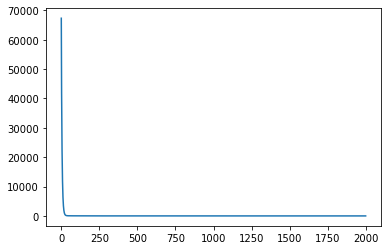

In [19]:
X_train,X_test,y_train,y_test = dosplit(main_df, allcomb, targ)

gdlr_model = GradientDescentLR(n_iters = 2000)
gdlr_model.fit(X_train, y_train)  

yhat_test = gdlr_model.predict(X_test)
print("MSE :", mean_squared_error(y_test, yhat_test))

#### 2. Special Features individually

In [20]:
for col in specComb:
    print("For", col, ':')
    X_train,X_test,y_train,y_test = dosplit(main_df, [col], targ)

    gdlr_model = GradientDescentLR(n_iters = 2000, plot=False)
    gdlr_model.fit(X_train, y_train)  

    yhat_test = gdlr_model.predict(X_test)
    print("MSE :", mean_squared_error(y_test, yhat_test))
    print("")

For Transmission :
MSE : 2671.6324507896825

For Fuel Type :
MSE : 3367.407927000919

For Fuel Consumption Comb (L/100 km) :
MSE : 559.2187681792111

For Engine Size(L) :
MSE : 913.523397860098

For Cylinders :
MSE : 1113.7201755521694



#### 3. Special features collectively

MSE : 32.55619205636697


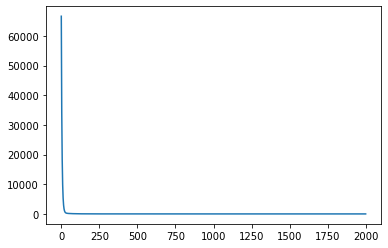

In [21]:
X_train,X_test,y_train,y_test = dosplit(main_df, specComb, targ)

gdlr_model = GradientDescentLR(n_iters = 2000)
gdlr_model.fit(X_train, y_train)  

yhat_test = gdlr_model.predict(X_test)
print("MSE :", mean_squared_error(y_test, yhat_test))

## D. Newton's Method Solution
-----

In [22]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

class NewtonMethodLR:
    
    def __init__(self, learning_rate=0.0003, n_iters=1000, plot=True):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.plot = plot
    
    def fit(self, X, y):
        
        # Adding a column of ones to the features
        Xd = np.c_[np.ones(X.shape[0]), X]
        n_samples = Xd.shape[0] 
        H = Xd.T @ Xd
        Hinv = np.linalg.pinv(H);
                
        self.weights = np.random.uniform(low=-1, high=1, size=Xd.shape[1])
        costs = []
        
        for _ in range(self.n_iters):
            y_predicted = np.dot(Xd,self.weights)
            change = np.dot(Xd.T, y_predicted-y)
            self.weights -= Hinv@change
            
            if(self.plot):
                costs.append(np.mean((y - y_predicted)**2))
                
        if(self.plot):
            plt.plot(costs)
        
    def predict(self, X):
        
        Xd = np.c_[np.ones(X.shape[0]), X]
        y_approximated = np.dot(Xd, self.weights)

        return y_approximated

### Finding the model for different cases

#### 1. For all the features

MSE : 25.11101604397953


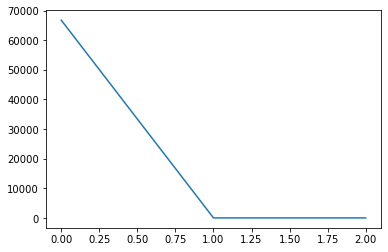

In [23]:
X_train,X_test,y_train,y_test = dosplit(main_df, allcomb, targ)

nmlr_model = NewtonMethodLR(n_iters = 3)
nmlr_model.fit(X_train, y_train) 

yhat_test = nmlr_model.predict(X_test)
print("MSE :", mean_squared_error(y_test, yhat_test))

#### 2. Special Features individually

In [24]:
for col in specComb:
    print("For", col, ':')
    X_train,X_test,y_train,y_test = dosplit(main_df, [col], targ)

    nmlr_model = NewtonMethodLR(n_iters = 3, plot=False)
    nmlr_model.fit(X_train, y_train)  

    yhat_test = nmlr_model.predict(X_test)
    print("MSE :", mean_squared_error(y_test, yhat_test))
    print("")

For Transmission :
MSE : 2667.307364714239

For Fuel Type :
MSE : 3367.4079477295704

For Fuel Consumption Comb (L/100 km) :
MSE : 559.2187681792112

For Engine Size(L) :
MSE : 913.5233978600984

For Cylinders :
MSE : 1113.720175552169



#### 3. Special features collectively

MSE : 32.558004407527704


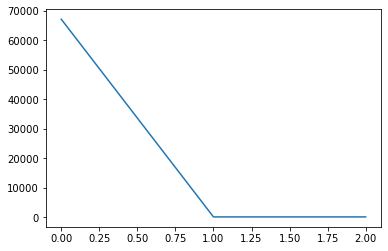

In [25]:
X_train,X_test,y_train,y_test = dosplit(main_df, specComb, targ)

nmlr_model = NewtonMethodLR(n_iters = 3)
nmlr_model.fit(X_train, y_train) 

yhat_test = nmlr_model.predict(X_test)
print("MSE :", mean_squared_error(y_test, yhat_test))

<br>

## E. Linear Regression using SKLearn*

----

\* This was not required but done for assessment of the implemented models

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
X_train,X_test,y_train,y_test = dosplit(main_df, allcomb, targ)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

yhat_test = lr_model.predict(X_test)
mean_squared_error(y_test, yhat_test)

25.1110160439795